Mapped reads

In [2]:
global read_009309
global read_181410
global read_183377

global samp_009390
global samp_181410
global samp_183377

read_009309 = 24237308
read_181410 = 44590098
read_183377 = 36747492

samp_009390 = "ERR009309_1_2"
samp_181410 = "ERR181410_1_2"
samp_183377 = "ERR183377_1_2"

all_samples=[samp_009390, samp_181410, samp_183377]
tools = ['bowtie2' , 'bowtie', 'subread' , 'smalt', 'STAR']

In [3]:
#import data
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from functools import reduce
import numpy as np


subread_df=pd.read_csv("/u/flashscratch/p/pelin/scripts/outputs/subread_results.csv")
smalt_df=pd.read_csv("/u/flashscratch/p/pelin/scripts/outputs/smalt_results.csv")
bowtie_df=pd.read_csv("/u/flashscratch/p/pelin/scripts/outputs/bowtie_results.csv")
bowtie2_df=pd.read_csv("/u/flashscratch/p/pelin/scripts/outputs/bowtie2_results.csv")
STAR_df=pd.read_csv("/u/flashscratch/p/pelin/scripts/outputs/STAR_results.csv")

tool_df=[subread_df, smalt_df, bowtie_df, bowtie2_df, STAR_df]
name_df=['subread', 'smalt','bowtie', 'bowtie2', 'STAR']

new_tool_df=[]

for t_df, n_df in zip(tool_df, name_df ):
#     print(n_df)
    t_df.insert(1,'#reads',None)
    t_df.insert(4,'%read1',None)
    t_df.insert(6,'%read2',None)
    t_df.insert(2,'tool',n_df)
    t_df.iloc[0:5,1] = read_009309
    t_df.iloc[5:10,1] = read_181410
    t_df.iloc[10:15,1] = read_183377
    t_df['%read1']=round((t_df['unique mapped read 1'] * 100)/t_df['#reads'],2)
    t_df['%read2']=round((t_df['unique mapped read 2'] * 100)/t_df['#reads'],2)
    new_tool_df.append(t_df)
    
new_tool_df[4]

# concat_df=reduce(lambda x, y: pd.concat([x, y]), new_tool_df)
# concat_df
# print(subread_df)




,sample,#reads,tool,original vs,unique mapped read 1,%read1,unique mapped read 2,%read2,intersected,reads,rp,r_p,r_pe,rp_e,rp_c,rc_p,r_pc,rpc_e,rce_p,rc_pe
0,ERR009309_1_2,24237308,STAR,o,19214897,79.28,19214897,79.28,19214897,19214897,19214897,0,0,0,0,0,0,0,0,0
1,ERR009309_1_2,24237308,STAR,s1,19214897,79.28,19214897,79.28,19214897,19214897,19214897,0,0,0,0,0,0,0,0,0
2,ERR009309_1_2,24237308,STAR,s2,19214897,79.28,19214897,79.28,19214897,19214897,19214897,0,0,0,0,0,0,0,0,0
3,ERR009309_1_2,24237308,STAR,s3,19214897,79.28,19214897,79.28,19214897,19214897,19214897,0,0,0,0,0,0,0,0,0
4,ERR009309_1_2,24237308,STAR,rv,19214897,79.28,19201446,79.22,19163073,19187360,19163709,23651,13335,53,636,535,23116,0,10,525
5,ERR181410_1_2,44590098,STAR,o,39991487,89.69,39991487,89.69,39991487,39991487,39991487,0,0,0,0,0,0,0,0,0
6,ERR181410_1_2,44590098,STAR,s1,39991487,89.69,39991487,89.69,39991487,39991487,39991487,0,0,0,0,0,0,0,0,0
7,ERR181410_1_2,44590098,STAR,s2,39991487,89.69,39991487,89.69,39991487,39991487,39991487,0,0,0,0,0,0,0,0,0
8,ERR181410_1_2,44590098,STAR,s3,39991487,89.69,39991487,89.69,39991487,39991487,39991487,0,0,0,0,0,0,0,0,0
9,ERR181410_1_2,44590098,STAR,rv,39991487,89.69,39987441,89.68,39957684,39972881,39958188,14693,7044,42,504,233,14460,0,7,226


In [32]:
# bar plot mapped percentage

def plot1(samp, h):
    appended_data = []
    cur_tool_df = []
    cur_tool = []
    for i in range((len(new_tool_df))):
        cur_tool = new_tool_df[i]
        read1_per=cur_tool[cur_tool['sample'] == samp]['%read1']
        read1_per = read1_per.iloc[0]
        cur_tool = cur_tool[cur_tool['sample'] == samp]
        cur_tool=cur_tool[h]
        headers = cur_tool.iloc[:,1]
        cur_tool_t=cur_tool.transpose()
        cur_tool=cur_tool_t.rename(columns=headers)
        cur_tool.insert(loc=0, column='original', value=read1_per)
        cur_tool=cur_tool.rename(index={'%read2': cur_tool.iloc[0,1]})
        cur_tool= cur_tool[3:]
        cur_tool =cur_tool.drop(['s2', 's3'], axis=1)
#         print(cur_tool)
        cur_tool_df.append(cur_tool)

    appended_data = pd.concat(cur_tool_df)

    ax=appended_data.plot(kind='bar')
    ax.set_ylim(bottom=0, top=100)
#     plt.rcParams["figure.figsize"] = [5,3]
#     fig.set_size_inches(5, 8)

    plt.legend(['original', 'ordered', 'shuffled', 'rev comp'],
               loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.xticks(rotation=45)
    plt.savefig(samp + ".png", bbox_inches='tight', dpi=100)



# for i in range(len(all_samples)):
    
#     plot1(all_samples[i], ['tool', 'original vs', '%read1', '%read2'])





In [50]:
# pie charts
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.CRITICAL)

def plot1(tool_df, samp, headers, title):
    tool_df=tool_df[tool_df['sample'] == samp]
    tool_df=tool_df[['original vs', 'rp' ,'r_p',]]
    tool_df=tool_df.transpose()
    tool_df=tool_df[1:]
    tool_df.columns = headers


    sub_plots=tool_df.plot.pie(y=headers, subplots=True,labels=None, autopct='%1.2f%%', figsize =(20,5),
                     labeldistance=1, explode = (0.1, 0), colors=['blue', 'red'],fontsize = 15)
    
    for j in range(len(sub_plots)):
        sub_plots[j].legend( loc="best", labels=['same pos', 'diff pos'])
    plt.suptitle(title, fontsize=20)
    
    
#     plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
#     ax1.set_title('Frauen', fontdict={'fontsize': 17})
    
#     plt.rcParams['font.weight'] = 1
    plt.savefig(title + "_" + samp + ".png", bbox_inches='tight', dpi=50)



head=["ordered", "shuffled1", "shuffled2", "shuffled3", "rev comp"]

# for i in range(len(all_samples)):
# for i in range(1):
# plot1(subread_df, all_samples[2], head,'subread')
# plot1(smalt_df, all_samples[2], head, 'smalt')
# plot1(bowtie_df, all_samples[2], head, 'bowtie')
# plot1(bowtie2_df, all_samples[2], head, 'bowtie2')
# plot1(STAR_df, all_samples[2], head, 'STAR')




In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# # if using a Jupyter notebook, include:
# %matplotlib inline

# # generate some random data
# data1 = np.random.normal(0, 6, 100)
# data2 = np.random.normal(0, 7, 100)
# data3 = np.random.normal(0, 8, 100)
# data4 = np.random.normal(0, 9, 100)
# data = list([data1, data2, data3, data4])
# print(data)


# fig, ax = plt.subplots()


# # build a violin plot
# ax.violinplot(data, showmeans=False, showmedians=True)


# # add title and axis labels
# ax.set_title('violin plot')
# ax.set_xlabel('x-axis')
# ax.set_ylabel('y-axis')


# # add x-tick labels
# xticklabels = ['category 1', 'category 2', 'category 3', 'category 4']
# ax.set_xticks([1,2,3,4])
# ax.set_xticklabels(xticklabels)


# # add horizontal grid lines
# ax.yaxis.grid(True)

# # show the plot
# plt.show()

STAR_ERR009309_1_2_rv-diff_pos.txt


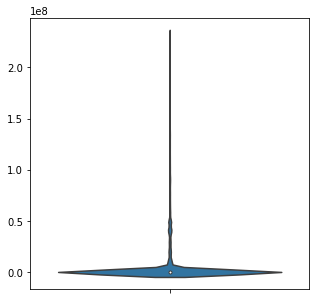

In [71]:
import glob, os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
import dask.dataframe as dd


os.chdir("/u/flashscratch/p/pelin/scripts/outputs")
df_file = []
df_file_txt = []
for file in glob.glob(tools[4] + "_" + samp_009390 + "_*.txt"):
    df_file.append(file)
    df_file_txt.append(dd.read_csv(file, header=None))
# print(df_file)
# print(df_file_txt)
data = []
category = []
for i in range(len(df_file_txt)):
    data.append(np.asarray(df_file_txt[i]))
    category.append(df_file[i])
    
# f = plt.figure()

for j in range(len(category)):
    print(category[j])
    fig, ax = pyplot.subplots(figsize=(5, 5))
    ax.autoscale(enable=True)
    sns.violinplot(ax=ax, y=data[j])
    fig.savefig(category[j] + ".png", bbox_inches='tight', dpi=100)




